# 3.3 Geographic Visualization: Food Access by State

### This script contains:
### 1. Import data and libraries
### 2. Data wrangling
### 3. Data cleaning
### 4. Plotting a choropleth map


### 1. Import data and libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [85]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [86]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\dsadl\OneDrive\Documents\Career Foundry\Data Immersion\Project 6\Food Environment Analysis\02 Data\Original Data\us-states.json'

In [87]:
# Preview JSON file contents:

f = open(r'C:\Users\dsadl\OneDrive\Documents\Career Foundry\Data Immersion\Project 6\Food Environment Analysis\02 Data\Original Data\us-states.json',)
  
# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [88]:
path = r'C:\Users\dsadl\OneDrive\Documents\Career Foundry\Data Immersion\Project 6\Food Environment Analysis'

In [89]:
# Import the food environment and supplemental state data

merged = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_data_imputed.csv'))
supp = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'supplemental_state_data.csv'))

In [90]:
merged.head()

,FIPS,State,County,laccess,pct_laccess,lowinc_laccess,pct_lowinc_laccess,snap_laccess,pct_snap_laccess,child_laccess,...,pct_pacific_laccess,multi_laccess,pct_multi_laccess,pct_snap,pct_snap_participation,pct_adult_diabetes,pct_adult_obese,pct_food_insec,pct_vlow_foodsecure,med_income
0,1001,AL,Autauga,17496.693040,32.062255,6543.676824,11.991125,931.935186,4.608749,4616.971480,...,0.016159,482.848633,0.884808,16.500056,86.898,13.0,36.3,16.3,7.1,56580.0
1,1003,AL,Baldwin,30561.264430,16.767489,9886.831137,5.424427,950.535290,1.298900,7007.972675,...,0.008131,1127.696098,0.618712,16.500056,86.898,10.4,36.3,16.3,7.1,52387.0
2,1005,AL,Barbour,6069.523628,22.105560,2948.790251,10.739667,422.569040,4.303147,1031.927776,...,0.029436,462.382655,1.684025,16.500056,86.898,18.4,36.3,16.3,7.1,31433.0
3,1007,AL,Bibb,969.378841,4.230324,596.162829,2.601627,53.818772,0.676710,232.642670,...,0.000000,5.259244,0.022951,16.500056,86.898,14.8,36.3,16.3,7.1,40767.0
4,1009,AL,Blount,3724.428242,6.497380,1650.959482,2.880150,175.370338,0.812727,910.686113,...,0.001854,202.914186,0.353990,16.500056,86.898,14.1,36.3,16.3,7.1,50487.0


In [91]:
merged.shape

(3143, 34)

In [92]:
supp.head()

,StateFIPS,State,State_Abb,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018,...,SFSP_PART_2016,SFSP_PART_2017,SFSP_PART_2018,State_Population_2012,State_Population_2013,State_Population_2014,State_Population_2015,State_Population_2016,State_Population_2017,State_Population_2018
0,1,Alabama,AL,"141,900","139,001","131,046","132,133","129,160","123,993","120,605",...,"48,691","51,622","51,222","4,815,564","4,830,460","4,842,481","4,853,160","4,864,745","4,875,120","4,887,871"
1,2,Alaska,AK,"24,969","23,055","19,605","19,682","19,121","18,188","17,092",...,"4,688","4,959","4,266","730,399","737,045","736,307","737,547","741,504","739,786","737,438"
2,4,Arizona,AZ,"193,214","182,501","173,020","167,072","163,998","153,510","149,513",...,"13,924","12,301","14,701","6,556,629","6,634,999","6,733,840","6,833,596","6,945,452","7,048,876","7,171,646"
3,5,Arkansas,AR,"94,293","89,777","83,289","84,220","80,555","76,519","73,607",...,"35,767","23,544","18,211","2,952,109","2,959,549","2,967,726","2,978,407","2,990,410","3,002,997","3,013,825"
4,6,California,CA,"1,472,468","1,431,881","1,348,939","1,265,005","1,174,875","1,080,241","1,009,492",...,"123,477","152,251","144,780","37,960,782","38,280,824","38,625,139","38,953,142","39,209,127","39,399,349","39,557,045"


In [93]:
supp.shape

(51, 45)

### 2. Data wrangling

In [94]:
# Create subsets of food environment and supplemental data
# Subset of the number of low food access population in 2015 by state

columns = ['State', 'laccess']

In [95]:
states = merged[columns]

In [96]:
states.head()

,State,laccess
0,AL,17496.693040
1,AL,30561.264430
2,AL,6069.523628
3,AL,969.378841
4,AL,3724.428242


In [97]:
# Sum the population with low food access for each state

states = states.groupby('State').sum('laccess')

In [98]:
states.head()

,laccess
State,
AK,2.235501e+05
AL,9.629109e+05
AR,5.879211e+05
AZ,1.254358e+06
CA,4.323350e+06


In [99]:
states.shape

(51, 1)

In [100]:
# Subset of the population of each state for 2015

columns_2 = ['State_Abb', 'State_Population_2015']

In [101]:
states_2 = supp[columns_2]

In [102]:
states_2.head()

,State_Abb,State_Population_2015
0,AL,"4,853,160"
1,AK,"737,547"
2,AZ,"6,833,596"
3,AR,"2,978,407"
4,CA,"38,953,142"


In [103]:
# Rename state abbreviation column in supplemental data for consistency with merged data
states_2.rename(columns = {'State_Abb' : 'State'}, inplace = True)

C:\Users\dsadl\AppData\Local\Temp\ipykernel_12196\2023510707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_2.rename(columns = {'State_Abb' : 'State'}, inplace = True)


In [104]:
states_2.head()

,State,State_Population_2015
0,AL,"4,853,160"
1,AK,"737,547"
2,AZ,"6,833,596"
3,AR,"2,978,407"
4,CA,"38,953,142"


In [105]:
states_merged = states.merge(states_2, on = 'State')

In [106]:
states_merged

,State,laccess,State_Population_2015
0,AK,2.235501e+05,"737,547"
1,AL,9.629109e+05,"4,853,160"
2,AR,5.879211e+05,"2,978,407"
3,AZ,1.254358e+06,"6,833,596"
4,CA,4.323350e+06,"38,953,142"
5,CO,9.473732e+05,"5,452,107"
6,CT,1.033866e+06,"3,587,509"
7,DC,1.268828e+04,"675,254"
8,DE,1.753863e+05,"941,413"
9,FL,3.986500e+06,"20,224,249"


In [107]:
states_merged.shape

(51, 3)

In [108]:
# Check data types

states_merged.dtypes

State                     object
laccess                  float64
State_Population_2015     object
dtype: object

In [109]:
# Change state population data type to float 64
# Requires first removing commas from numbers

states_merged.replace(',','', regex=True, inplace=True)

In [110]:
states_merged['State_Population_2015'] = states_merged['State_Population_2015'].astype('float64')

In [111]:
states_merged.dtypes

State                     object
laccess                  float64
State_Population_2015    float64
dtype: object

In [130]:
# Add a column of the percentage of low food access per state

states_merged["state_pct_laccess"] = states_merged["laccess"] / states_merged["State_Population_2015"]

In [113]:
states_merged.head()

,State,laccess,State_Population_2015,state_pct_laccess
0,AK,2.235501e+05,737547.0,0.303099
1,AL,9.629109e+05,4853160.0,0.198409
2,AR,5.879211e+05,2978407.0,0.197394
3,AZ,1.254358e+06,6833596.0,0.183558
4,CA,4.323350e+06,38953142.0,0.110988


In [131]:
states_merged['state_pct_laccess'] = (states_merged['state_pct_laccess'] * 100)

In [133]:
states_merged.head()

,State,laccess,State_Population_2015,state_pct_laccess
0,AK,2.235501e+05,737547.0,30.309948
1,AL,9.629109e+05,4853160.0,19.840906
2,AR,5.879211e+05,2978407.0,19.739447
3,AZ,1.254358e+06,6833596.0,18.355750
4,CA,4.323350e+06,38953142.0,11.098847


In [134]:
states_merged.shape

(51, 4)

### 3. Conduct consistency checks

In [135]:
# Check for missing values

states_merged.isnull().sum()

State                    0
laccess                  0
State_Population_2015    0
state_pct_laccess        0
dtype: int64

In [136]:
# Check for duplicates

dups = states_merged.duplicated()

In [137]:
dups.shape # no duplicates

(51,)

<Axes: xlabel='state_pct_laccess', ylabel='Count'>

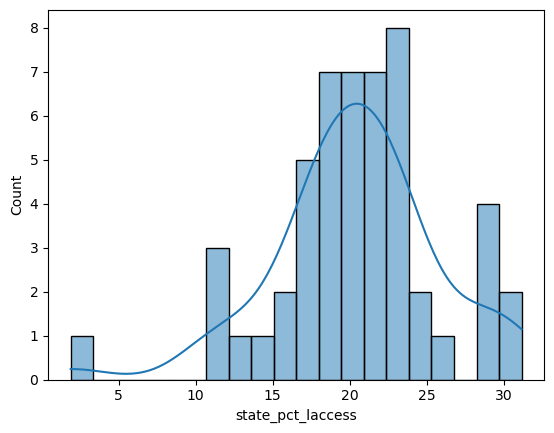

In [138]:
# Check for extreme values

sns.histplot(states_merged['state_pct_laccess'], bins=20, kde = True) # no extreme values

### 4. Plotting choropleths

In [139]:
# Create a data frame with just the states and state low food access percentages

data_to_plot = states_merged[['State','state_pct_laccess']]
data_to_plot.head()

,State,state_pct_laccess
0,AK,30.309948
1,AL,19.840906
2,AR,19.739447
3,AZ,18.355750
4,CA,11.098847


In [140]:
# Create map
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', 'state_pct_laccess'],
    key_on = 'feature.id',
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "percent low food access").add_to(map)
folium.LayerControl().add_to(map)

In [141]:
map

In [142]:
map.save('states_pct_laccess.html')

In [143]:
states_merged.to_csv(os.path.join(path, '02 Data','Prepared Data', 'states_pct_laccess.csv'))

### Results discussion

The information from this map provides additional information to answer the question about how different geographical areas of the U.S. experience low access to food. Low access to food impacts all of the regions of the U.S., most greatly affecting the Southwest, Southeast, and Midwest, as well as Alaska and Hawaii. Many of my initial questions were investigating food insecurity and how that affects different populations in the U.S., but exploratory analysis didn't show a relationship between food insecurity, median income, and low food access. After this geographic analysis, location appears to play a role, with states in rural regions showing larger percentages of low food access (using [U.S. Rural Areas, 2010 US Census](https://mtgis-portal.geo.census.gov/arcgis/apps/MapSeries/index.html?appid=49cd4bc9c8eb444ab51218c1d5001ef6) for comparison).

This provides additional context in exploring the variable of location in the hypotheses proposed after the exploratory analysis. Where previously I have been examining the data at the county level for location, I can broaden that analysis to the state level.
- As rates of low food access in a state increase, rates of children with low food access increase.
- As rates of low food access in a state increase, rates of seniors with low food access increase.
- As rates of low food access in a state increase, rates of people with low incomes with low food access increase.
- As state median incomes decrease, state rates of adult diabetes increase.